In [1]:
!nvidia-smi

Sat Jun 18 13:52:14 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
import os

# Exploring Dataset

In [3]:
for root, subdirs, files in os.walk('/content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning'):
    print(root, ", Number of files: ",len(files))

/content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning , Number of files:  0
/content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning/JAWA TENGAH , Number of files:  0
/content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning/JAWA TENGAH/Sidomukti , Number of files:  500
/content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning/JAWA TENGAH/Parang , Number of files:  500
/content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning/JAWA TENGAH/Kawung , Number of files:  500
/content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning/JAWA TENGAH/Ceplok , Number of files:  502
/content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning/MADURA , Number of files:  0
/content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning/MADURA/Pancawarna , Number of files:  500
/content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir D

# Creating Data Loader

In [4]:
# Reads an image from a file, decodes it into a dense tensor, and resizes it
# to a fixed shape.
def parse_image(filename):
  parts = filename.split('/')
  label = parts[-2]
  
  image = tf.io.read_file(filename)
  image = tf.io.decode_jpeg(image, channels=3)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, [250, 250])
  return image, label

Text(0.5, 1.0, 'Ceplok')

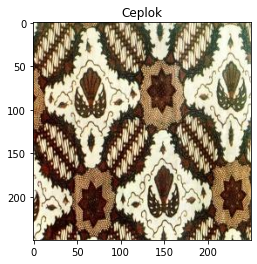

In [5]:
image, label = parse_image("/content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning/augmented/JAWA TENGAH/Ceplok/h_1.jpg")
plt.imshow(image)
plt.title(label)

Text(0.5, 1.0, 'Ceplok')

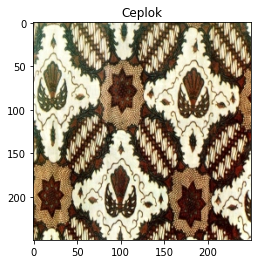

In [6]:
image, label = parse_image("/content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning/JAWA TENGAH/Ceplok/1.jpg")
plt.imshow(image)
plt.title(label)

In [8]:
def load_data(dir, manual_labelling=-1, class_names=None):
    dir_names = os.listdir(dir)
    
    X = []
    y = []
    for i in range(len(dir_names)):
        class_dir = dir + "/" + dir_names[i]
        filenames = os.listdir(class_dir)
        
        images = []
        print("reading", class_dir)
        for file in filenames:
            image, label = parse_image(class_dir + "/" + file)
            X.append(image)
            
            if manual_labelling != -1:
                y.append(manual_labelling)
            else:                
                if label == 'Sidomukti':
                    y.append(0)
                elif label == 'Parang':
                    y.append(1)
                elif label == 'Kawung':
                    y.append(2)
                elif label == 'Ceplok':
                    y.append(3)
                else:
                    print("NO LABEL")

    if manual_labelling != -1:
        return tf.stack(X), tf.stack(y), class_names
    else:
        return tf.stack(X), tf.one_hot(tf.stack(y), len(class_names)), class_names

# X, y, class_names = load_data("/content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning/JAWA TENGAH", class_names=['Sidomukti', 'Parang', 'Kawung', 'Ceplok'])   

In [ ]:
def load_data_binary(dir):    
    class_names = ["NON JAWA TENGAH", "JAWA TENGAH"]
    JT_X, JT_y, _ = load_data('/content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning/JAWA TENGAH', 1)
    MD_X, MD_y, _ = load_data('/content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning/MADURA', 0)
    PK_X, PK_y, _ = load_data('/content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning/PEKALONGAN', 0)
    

    X = np.concatenate((JT_X, MD_X, PK_X), axis=0)
    y = np.concatenate((JT_y, MD_y, PK_y), axis=0)
    
    return X, y, class_names

X, y, class_names = load_data_binary("/content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning")

In [ ]:
def load_data_binary_augmented():    
    class_names = ["NON JAWA TENGAH", "JAWA TENGAH"]
    JT_X, JT_y, _ = load_data('/content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning/JAWA TENGAH', 1)
    MD_X, MD_y, _ = load_data('/content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning/MADURA', 0)
    PK_X, PK_y, _ = load_data('/content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning/PEKALONGAN', 0)
    JT_X_aug, JT_y_aug, _ = load_data('/content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning/augmented/JAWA TENGAH', 1)
    MD_X_aug, MD_y_aug, _ = load_data('/content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning/augmented/MADURA', 0)
    PK_X_aug, PK_y_aug, _ = load_data('/content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning/augmented/PEKALONGAN', 0)

    X = np.concatenate((JT_X, MD_X, PK_X, JT_X_aug, MD_X_aug, PK_X_aug), axis=0)
    y = np.concatenate((JT_y, MD_y, PK_y, JT_X_aug, MD_X_aug, PK_X_aug), axis=0)
    
    return X, y, class_names

X, y, class_names = load_data_binary_augmented()

reading /content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning/JAWA TENGAH/Sidomukti
reading /content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning/JAWA TENGAH/Parang
reading /content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning/JAWA TENGAH/Kawung
reading /content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning/JAWA TENGAH/Ceplok
reading /content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning/MADURA/Pancawarna
reading /content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning/MADURA/Serat Kayu
reading /content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning/MADURA/Kacangan
reading /content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning/PEKALONGAN/Terang Bulan
reading /content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning/PEKALONGAN/Tujuh Rupa
reading /content/drive/MyDrive/Colab Not

ResourceExhaustedError: ignored

In [ ]:
def load_data_multiclass_augmented():    
    no_X, no_y, class_names = load_data("/content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning/JAWA TENGAH", class_names=['Sidomukti', 'Parang', 'Kawung', 'Ceplok'])
    aug_X, aug_y, class_names = load_data('/content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning/augmented/JAWA TENGAH', class_names=['Sidomukti', 'Parang', 'Kawung', 'Ceplok'])


    X = np.concatenate((no_X, aug_X), axis=0)
    y = np.concatenate((no_y, aug_y), axis=0)
    
    return X, y, class_names

X, y, class_names = load_data_multiclass_augmented()

reading /content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning/JAWA TENGAH/Sidomukti
reading /content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning/JAWA TENGAH/Parang
reading /content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning/JAWA TENGAH/Kawung
reading /content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning/JAWA TENGAH/Ceplok
reading /content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning/augmented/JAWA TENGAH/Parang
reading /content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning/augmented/JAWA TENGAH/Kawung
reading /content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning/augmented/JAWA TENGAH/Ceplok
reading /content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning/augmented/JAWA TENGAH/Sidomukti


In [ ]:
MD_y = np.repeat([[0, 0, 0, 0, 1]], 8, axis=0)
MD_y

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

In [9]:
def load_data_multiclass_misc():    
    no_X, no_y, class_names = load_data("/content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning/JAWA TENGAH", class_names=['Sidomukti', 'Parang', 'Kawung', 'Ceplok', 'Lain-Lain'])   
    MD_X, MD_y, _ = load_data('/content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning/MADURA', 4)
    PK_X, PK_y, _ = load_data('/content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning/PEKALONGAN', 4)
    MD_y = np.repeat([[0, 0, 0, 0, 1]], len(MD_y), axis=0)
    PK_y = np.repeat([[0, 0, 0, 0, 1]], len(PK_y), axis=0)

    print(no_y.shape)
    print(MD_y.shape)

    X = np.concatenate((no_X, MD_X, PK_X), axis=0)
    y = np.concatenate((no_y, MD_y, PK_y), axis=0)
    
    return X, y, class_names
X, y, class_names = load_data_multiclass_misc()

reading /content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning/JAWA TENGAH/Sidomukti
reading /content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning/JAWA TENGAH/Parang
reading /content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning/JAWA TENGAH/Kawung
reading /content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning/JAWA TENGAH/Ceplok
reading /content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning/MADURA/Pancawarna
reading /content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning/MADURA/Serat Kayu
reading /content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning/MADURA/Kacangan
reading /content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning/PEKALONGAN/Terang Bulan
reading /content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning/PEKALONGAN/Tujuh Rupa
reading /content/drive/MyDrive/Colab Not

In [10]:
X.shape, y.shape, class_names

((5756, 250, 250, 3),
 (5756, 5),
 ['Sidomukti', 'Parang', 'Kawung', 'Ceplok', 'Lain-Lain'])

In [11]:
y[2000]

array([0., 0., 0., 1., 0.])

# Train Test Splitting


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X, y = None, None

len(X_train), len(X_test), len(y_train), len(y_test)

(4604, 1152, 4604, 1152)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.numpy(), y.numpy(), test_size=0.2, random_state=42)

X, y = None, None

len(X_train), len(X_test), len(y_train), len(y_test)

(1601, 401, 1601, 401)

In [13]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

X_train, y_train, X_test, y_test = None, None, None, None

In [14]:
train_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(250, 250, 3), dtype=tf.float32, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [15]:
BATCH_SIZE = 32

train_dataset = train_dataset.shuffle(buffer_size=100).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [16]:
train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 250, 250, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

# Experiment List

* ImageNet trained Transfer Learning MobileNetV1
* ImageNet trained Transfer Learning MobileNetV1 with layer 73 - 85 trainable
* MobileNetV1 from scratch

# EXPERIMENT 1: MobileNet Architecture

In [ ]:
mobilenet = tf.keras.applications.MobileNet(include_top=False, input_shape=(250, 250, 3))
mobilenet.trainable = False

17235968/17225924 [==============================] - 0s 0us/step


## Create Callback

In [ ]:
checkpoint_path = "/content/drive/MyDrive/Colab Notebooks/DeepLearning/transfer_mobilenet_multiclass_misc/cp-{epoch:04d}.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         monitor='val_accuracy',
                                                         save_weights_only=True,
                                                         save_best_only=True,
                                                         verbose=1)

## Multiclass

In [ ]:
# Setup model architecture
INPUT_SHAPE = (250, 250, 3)
inputs = tf.keras.Input(shape=INPUT_SHAPE, name="input_layer")

x = mobilenet.output 

x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)

outputs = tf.keras.layers.Dense(len(class_names),
                                activation='softmax',
                                name='output_layer')(x)

model = tf.keras.Model(mobilenet.input, outputs)

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

## Binary Model

In [ ]:
# Setup model architecture
INPUT_SHAPE = (250, 250, 3)
inputs = tf.keras.Input(shape=INPUT_SHAPE, name="input_layer")

x = mobilenet.output 

x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)

outputs = tf.keras.layers.Dense(1,
                                activation='sigmoid',
                                name='output_layer')(x)

model = tf.keras.Model(mobilenet.input, outputs)

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

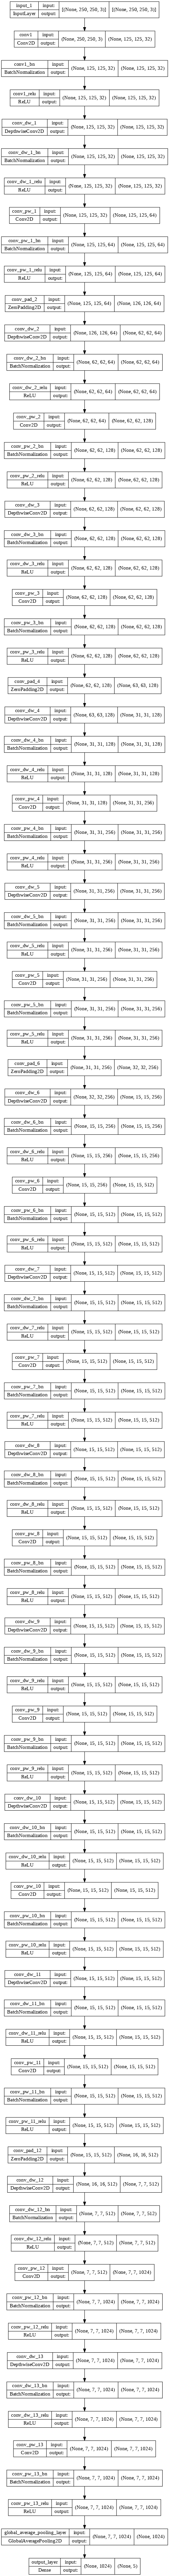

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, dpi=76, to_file='model_v1.png')

In [ ]:
tf.config.run_functions_eagerly(True)

In [ ]:
int(0.2 * len(test_dataset))

7

In [ ]:
history = model.fit(train_dataset,                    
                    validation_data=test_dataset,
                    # validation_steps=int(0.2 * len(test_dataset)),
                    epochs=10,
                    callbacks=[checkpoint_callback])

Epoch 1/10
144/144 [==============================] - ETA: 0s - loss: 0.7452 - accuracy: 0.7496
Epoch 1: val_accuracy improved from -inf to 0.82205, saving model to /content/drive/MyDrive/Colab Notebooks/DeepLearning/transfer_mobilenet_multiclass_misc/cp-0001.ckpt
144/144 [==============================] - 39s 180ms/step - loss: 0.7452 - accuracy: 0.7496 - val_loss: 0.5360 - val_accuracy: 0.8220
Epoch 2/10
144/144 [==============================] - ETA: 0s - loss: 0.4796 - accuracy: 0.8364
Epoch 2: val_accuracy improved from 0.82205 to 0.84983, saving model to /content/drive/MyDrive/Colab Notebooks/DeepLearning/transfer_mobilenet_multiclass_misc/cp-0002.ckpt
144/144 [==============================] - 27s 184ms/step - loss: 0.4796 - accuracy: 0.8364 - val_loss: 0.4764 - val_accuracy: 0.8498
Epoch 3/10
144/144 [==============================] - ETA: 0s - loss: 0.4062 - accuracy: 0.8582
Epoch 3: val_accuracy did not improve from 0.84983
144/144 [==============================] - 26s 181ms

In [ ]:
history_ext = model.fit(train_dataset,                    
                    validation_data=test_dataset,
                    # validation_steps=int(0.2 * len(test_dataset)),
                    epochs=10,
                    callbacks=[checkpoint_callback])

Epoch 1/10
144/144 [==============================] - ETA: 0s - loss: 0.2107 - accuracy: 0.9333
Epoch 1: val_accuracy improved from 0.86285 to 0.86458, saving model to /content/drive/MyDrive/Colab Notebooks/DeepLearning/transfer_mobilenet_multiclass_misc/cp-0001.ckpt
144/144 [==============================] - 26s 182ms/step - loss: 0.2107 - accuracy: 0.9333 - val_loss: 0.4061 - val_accuracy: 0.8646
Epoch 2/10
144/144 [==============================] - ETA: 0s - loss: 0.2021 - accuracy: 0.9361
Epoch 2: val_accuracy did not improve from 0.86458
144/144 [==============================] - 26s 180ms/step - loss: 0.2021 - accuracy: 0.9361 - val_loss: 0.4113 - val_accuracy: 0.8646
Epoch 3/10
144/144 [==============================] - ETA: 0s - loss: 0.1906 - accuracy: 0.9403
Epoch 3: val_accuracy did not improve from 0.86458
144/144 [==============================] - 26s 180ms/step - loss: 0.1906 - accuracy: 0.9403 - val_loss: 0.4178 - val_accuracy: 0.8646
Epoch 4/10
144/144 [================

In [22]:
import copy
import itertools

In [ ]:
hist_dict = copy.deepcopy(history)
hist_dict

INFO:tensorflow:Assets written to: ram://bf55ec7c-e668-4e60-b50e-ed55dd9e6d3d/assets


In [ ]:
hist_dict.history['accuracy'] = [*history.history['accuracy'], *history_ext.history['accuracy']] 
hist_dict.history['val_accuracy'] = [*history.history['val_accuracy'], *history_ext.history['val_accuracy']] 
hist_dict.history['loss'] = [*history.history['loss'], *history_ext.history['loss']] 
hist_dict.history['val_loss'] = [*history.history['val_loss'], *history_ext.history['val_loss']] 

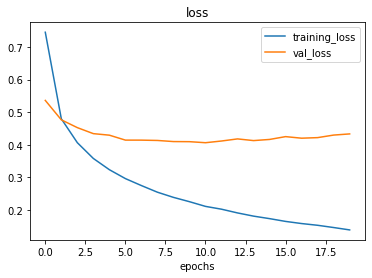

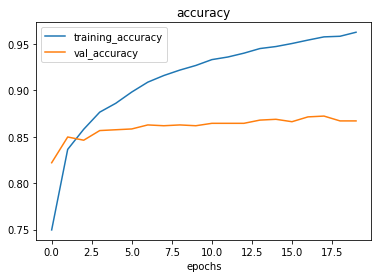

In [ ]:
plot_loss_curves(hist_dict)

In [ ]:
# fine_tune_epoch = 5 + 1 + history.epoch[-1]
# history_all_classes_10_percent_fine_tune = model.fit(train_dataset,
#                                                      epochs=fine_tune_epoch,                            
#                                                      validation_data=test_dataset,                                                     
#                                                      initial_epoch=history.epoch[-1], 
#                                                      callbacks=[checkpoint_callback])

In [ ]:
model.evaluate(test_dataset)

36/36 [==============================] - 3s 63ms/step - loss: 0.4331 - accuracy: 0.8672


[0.43313026428222656, 0.8671875]

In [ ]:
latest = tf.train.latest_checkpoint("/content/drive/MyDrive/Colab Notebooks/DeepLearning/transfer_mobilenet_multiclass_misc")
latest

'/content/drive/MyDrive/Colab Notebooks/DeepLearning/transfer_mobilenet_multiclass_misc/cp-0008.ckpt'

In [ ]:
loaded_model = tf.keras.models.clone_model(model)
loaded_model.load_weights(latest)

In [ ]:
loaded_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [ ]:
loaded_model.evaluate(test_dataset)

36/36 [==============================] - 3s 62ms/step - loss: 0.4217 - accuracy: 0.8724


[0.42173871397972107, 0.8723958134651184]

# Plot loss curves

In [17]:
# Plot the validation and training curves separately

def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss'])) # How many epochs

    
    # Plot loss
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

In [ ]:
history.history

{'accuracy': [0.886956512928009,
  0.8943734169006348,
  0.8964194655418396,
  0.9012787938117981,
  0.9035805463790894,
  0.9048593640327454],
 'loss': [0.28772518038749695,
  0.2775542736053467,
  0.26887643337249756,
  0.2613316476345062,
  0.25467562675476074,
  0.24873454868793488],
 'val_accuracy': [0.8711656332015991,
  0.8691206574440002,
  0.8650306463241577,
  0.8701431751251221,
  0.872188150882721,
  0.8680981397628784],
 'val_loss': [0.3089204430580139,
  0.3069039583206177,
  0.30578184127807617,
  0.30531272292137146,
  0.30532893538475037,
  0.30571046471595764]}

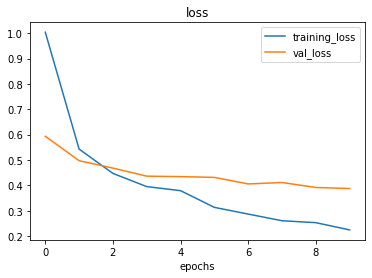

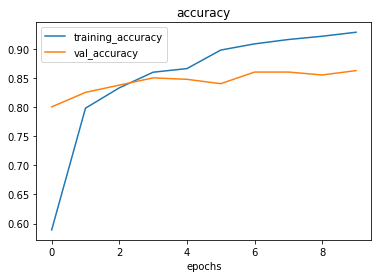

In [ ]:
plot_loss_curves(history)

# Test the Algorithm

- SIDOMUKTI
- PARANG
- KAWUNG
- CEPLOK

In [ ]:
latest = tf.train.latest_checkpoint("/content/drive/MyDrive/Colab Notebooks/DeepLearning/transfer_mobilenet_multiclass")
latest

'/content/drive/MyDrive/Colab Notebooks/DeepLearning/transfer_mobilenet_multiclass/cp-0010.ckpt'

In [ ]:
loaded_model = tf.keras.models.clone_model(model)
loaded_model.load_weights(latest)

In [ ]:
loaded_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [ ]:
!wget "https://s2.bukalapak.com/bukalapak-kontenz-production/content_attachments/75692/original/motif_batik_sidomukti_6.png" -O "tes_sidomukti1.png"

--2022-06-17 06:27:51--  https://s2.bukalapak.com/bukalapak-kontenz-production/content_attachments/75692/original/motif_batik_sidomukti_6.png
Resolving s2.bukalapak.com (s2.bukalapak.com)... 23.12.145.168, 23.12.145.140
Connecting to s2.bukalapak.com (s2.bukalapak.com)|23.12.145.168|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156927 (153K) [image/jpeg]
Saving to: ‘tes_sidomukti1.png’

tes_sidomukti1.png  100%[===================>] 153.25K  --.-KB/s    in 0.004s  

2022-06-17 06:27:51 (34.5 MB/s) - ‘tes_sidomukti1.png’ saved [156927/156927]



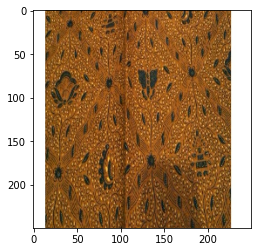

In [ ]:
image = tf.io.read_file("tes_sidomukti1.png")
image = tf.io.decode_jpeg(image)
image = tf.image.convert_image_dtype(image, tf.float32)
image = tf.image.resize(image, [250, 250])

plt.imshow(image)

In [ ]:
preds_prob = loaded_model.predict(tf.expand_dims(image, axis=0))
preds_prob

array([[0.9583432 , 0.01906205, 0.00282726, 0.01976748]], dtype=float32)

In [ ]:
preds = tf.argmax(tf.squeeze(preds_prob))
preds

<tf.Tensor: shape=(), dtype=int64, numpy=0>

In [ ]:
class_names[preds]

NameError: ignored

In [ ]:
!wget "https://img.freepik.com/free-vector/javanese-batik-kawung-pattern_67419-11.jpg?w=2000" -O "tes_kawung1.jpg"

--2022-06-17 06:30:59--  https://img.freepik.com/free-vector/javanese-batik-kawung-pattern_67419-11.jpg?w=2000
Resolving img.freepik.com (img.freepik.com)... 104.72.157.145, 2600:1408:9000:88a::30ec, 2600:1408:9000:89a::30ec
Connecting to img.freepik.com (img.freepik.com)|104.72.157.145|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 923656 (902K) [image/jpeg]
Saving to: ‘tes_kawung1.jpg’

tes_kawung1.jpg     100%[===================>] 902.01K  1.42MB/s    in 0.6s    

2022-06-17 06:31:00 (1.42 MB/s) - ‘tes_kawung1.jpg’ saved [923656/923656]



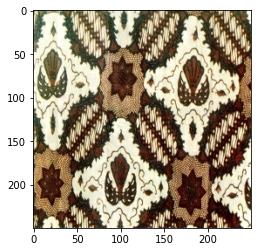

In [ ]:
image = tf.io.read_file("/content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning/JAWA TENGAH/Ceplok/1.jpg")
image = tf.io.decode_jpeg(image)
image = tf.image.convert_image_dtype(image, tf.float32)
image = tf.image.resize(image, [250, 250])

plt.imshow(image)

In [ ]:
preds_prob = loaded_model.predict(tf.expand_dims(image, axis=0))
preds_prob

array([[0.10872824, 0.00114462, 0.00100101, 0.8891261 ]], dtype=float32)

In [ ]:
preds = tf.argmax(tf.squeeze(preds_prob))
preds

<tf.Tensor: shape=(), dtype=int64, numpy=3>

In [ ]:
class_name[preds]

NameError: ignored

In [ ]:
!wget "https://www.batikjibb.com/wp-content/uploads/2021/08/08batik.jpg" -O "tes_parang1.jpg"

--2022-06-17 06:31:27--  https://www.batikjibb.com/wp-content/uploads/2021/08/08batik.jpg
Resolving www.batikjibb.com (www.batikjibb.com)... 185.151.48.70
Connecting to www.batikjibb.com (www.batikjibb.com)|185.151.48.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 131158 (128K) [image/jpeg]
Saving to: ‘tes_parang1.jpg’

tes_parang1.jpg     100%[===================>] 128.08K   176KB/s    in 0.7s    

2022-06-17 06:31:29 (176 KB/s) - ‘tes_parang1.jpg’ saved [131158/131158]



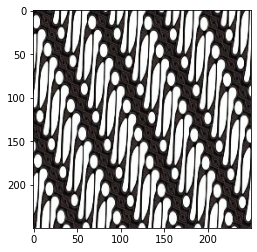

In [ ]:
image = tf.io.read_file("tes_parang1.jpg")
image = tf.io.decode_jpeg(image)
image = tf.image.convert_image_dtype(image, tf.float32)
image = tf.image.resize(image, [250, 250])

plt.imshow(image)

In [ ]:
preds_prob = loaded_model.predict(tf.expand_dims(image, axis=0))
preds_prob

array([[5.4447710e-08, 9.9974781e-01, 8.2717143e-08, 2.5210498e-04]],
      dtype=float32)

In [ ]:
preds = tf.argmax(tf.squeeze(preds_prob))
preds

<tf.Tensor: shape=(), dtype=int64, numpy=1>

In [ ]:
class_name[preds]

'Parang'

# EXPERIMENT 2: ImageNet trained Transfer Learning MobileNetV1 with layer 73 - 85

In [18]:
mobilenet2 = tf.keras.applications.MobileNet(include_top=False, input_shape=(250, 250, 3))
mobilenet2.trainable = False

17235968/17225924 [==============================] - 0s 0us/step


In [19]:
for i, layer in enumerate(mobilenet2.layers):
    if (i >= 73 and i <= 85):
        mobilenet2.layers[i].trainable = True
    print(i, layer.name, layer.input_shape, layer.output_shape, layer.trainable)

0 input_1 [(None, 250, 250, 3)] [(None, 250, 250, 3)] False
1 conv1 (None, 250, 250, 3) (None, 125, 125, 32) False
2 conv1_bn (None, 125, 125, 32) (None, 125, 125, 32) False
3 conv1_relu (None, 125, 125, 32) (None, 125, 125, 32) False
4 conv_dw_1 (None, 125, 125, 32) (None, 125, 125, 32) False
5 conv_dw_1_bn (None, 125, 125, 32) (None, 125, 125, 32) False
6 conv_dw_1_relu (None, 125, 125, 32) (None, 125, 125, 32) False
7 conv_pw_1 (None, 125, 125, 32) (None, 125, 125, 64) False
8 conv_pw_1_bn (None, 125, 125, 64) (None, 125, 125, 64) False
9 conv_pw_1_relu (None, 125, 125, 64) (None, 125, 125, 64) False
10 conv_pad_2 (None, 125, 125, 64) (None, 126, 126, 64) False
11 conv_dw_2 (None, 126, 126, 64) (None, 62, 62, 64) False
12 conv_dw_2_bn (None, 62, 62, 64) (None, 62, 62, 64) False
13 conv_dw_2_relu (None, 62, 62, 64) (None, 62, 62, 64) False
14 conv_pw_2 (None, 62, 62, 64) (None, 62, 62, 128) False
15 conv_pw_2_bn (None, 62, 62, 128) (None, 62, 62, 128) False
16 conv_pw_2_relu (None, 6

In [24]:
checkpoint_path = "/content/drive/MyDrive/Colab Notebooks/DeepLearning/transfer_mobilenet_73_85_unfrozen_multiclass_misc/cp-{epoch:04d}.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         monitor='val_accuracy',
                                                         save_weights_only=True,
                                                         save_best_only=True,
                                                         verbose=1)

## Multiclass

In [20]:
x = mobilenet2.output 

x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)

outputs = tf.keras.layers.Dense(len(class_names),
                                activation='softmax',
                                name='output_layer')(x)

model2 = tf.keras.Model(mobilenet2.input, outputs)

model2.compile(loss='categorical_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

## Binary

In [ ]:
# Setup model architecture
INPUT_SHAPE = (250, 250, 3)
inputs = tf.keras.Input(shape=INPUT_SHAPE, name="input_layer")

x = mobilenet2.output 

x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)

outputs = tf.keras.layers.Dense(1,
                                activation='sigmoid',
                                name='output_layer')(x)

model2 = tf.keras.Model(mobilenet2.input, outputs)

model2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [21]:
for i, layer in enumerate(model2.layers):
    print(i, layer.name, layer.input_shape, layer.output_shape, layer.trainable)

0 input_1 [(None, 250, 250, 3)] [(None, 250, 250, 3)] False
1 conv1 (None, 250, 250, 3) (None, 125, 125, 32) False
2 conv1_bn (None, 125, 125, 32) (None, 125, 125, 32) False
3 conv1_relu (None, 125, 125, 32) (None, 125, 125, 32) False
4 conv_dw_1 (None, 125, 125, 32) (None, 125, 125, 32) False
5 conv_dw_1_bn (None, 125, 125, 32) (None, 125, 125, 32) False
6 conv_dw_1_relu (None, 125, 125, 32) (None, 125, 125, 32) False
7 conv_pw_1 (None, 125, 125, 32) (None, 125, 125, 64) False
8 conv_pw_1_bn (None, 125, 125, 64) (None, 125, 125, 64) False
9 conv_pw_1_relu (None, 125, 125, 64) (None, 125, 125, 64) False
10 conv_pad_2 (None, 125, 125, 64) (None, 126, 126, 64) False
11 conv_dw_2 (None, 126, 126, 64) (None, 62, 62, 64) False
12 conv_dw_2_bn (None, 62, 62, 64) (None, 62, 62, 64) False
13 conv_dw_2_relu (None, 62, 62, 64) (None, 62, 62, 64) False
14 conv_pw_2 (None, 62, 62, 64) (None, 62, 62, 128) False
15 conv_pw_2_bn (None, 62, 62, 128) (None, 62, 62, 128) False
16 conv_pw_2_relu (None, 6

In [25]:
history2 = model2.fit(train_dataset,                    
                      validation_data=test_dataset,
                    #   validation_steps=int(0.2 * len(test_dataset)),
                      epochs=10,
                      callbacks=[checkpoint_callback])

Epoch 1/10
144/144 [==============================] - ETA: 0s - loss: 0.7038 - accuracy: 0.8017
Epoch 1: val_accuracy improved from -inf to 0.68316, saving model to /content/drive/MyDrive/Colab Notebooks/DeepLearning/transfer_mobilenet_73_85_unfrozen_multiclass_misc/cp-0001.ckpt
144/144 [==============================] - 29s 87ms/step - loss: 0.7038 - accuracy: 0.8017 - val_loss: 2.3316 - val_accuracy: 0.6832
Epoch 2/10
143/144 [============================>.] - ETA: 0s - loss: 0.1596 - accuracy: 0.9445
Epoch 2: val_accuracy improved from 0.68316 to 0.83767, saving model to /content/drive/MyDrive/Colab Notebooks/DeepLearning/transfer_mobilenet_73_85_unfrozen_multiclass_misc/cp-0002.ckpt
144/144 [==============================] - 12s 80ms/step - loss: 0.1593 - accuracy: 0.9446 - val_loss: 0.5808 - val_accuracy: 0.8377
Epoch 3/10
143/144 [============================>.] - ETA: 0s - loss: 0.0620 - accuracy: 0.9821
Epoch 3: val_accuracy did not improve from 0.83767
144/144 [===============

In [26]:
history2_ext = model2.fit(train_dataset,                    
                      validation_data=test_dataset,
                    #   validation_steps=int(0.2 * len(test_dataset)),
                      epochs=10,
                      callbacks=[checkpoint_callback])

Epoch 1/10
143/144 [============================>.] - ETA: 0s - loss: 0.0207 - accuracy: 0.9930
Epoch 1: val_accuracy did not improve from 0.83767
144/144 [==============================] - 11s 79ms/step - loss: 0.0227 - accuracy: 0.9926 - val_loss: 1.0277 - val_accuracy: 0.8273
Epoch 2/10
143/144 [============================>.] - ETA: 0s - loss: 0.0260 - accuracy: 0.9910
Epoch 2: val_accuracy did not improve from 0.83767
144/144 [==============================] - 11s 78ms/step - loss: 0.0258 - accuracy: 0.9911 - val_loss: 1.2831 - val_accuracy: 0.7457
Epoch 3/10
143/144 [============================>.] - ETA: 0s - loss: 0.0141 - accuracy: 0.9950
Epoch 3: val_accuracy improved from 0.83767 to 0.85677, saving model to /content/drive/MyDrive/Colab Notebooks/DeepLearning/transfer_mobilenet_73_85_unfrozen_multiclass_misc/cp-0003.ckpt
144/144 [==============================] - 12s 83ms/step - loss: 0.0140 - accuracy: 0.9950 - val_loss: 0.7493 - val_accuracy: 0.8568
Epoch 4/10
143/144 [====

In [27]:
model2.evaluate(test_dataset)

36/36 [==============================] - 4s 71ms/step - loss: 2.1320 - accuracy: 0.8116


[2.131972551345825, 0.8116319179534912]

In [29]:
latest = tf.train.latest_checkpoint("/content/drive/MyDrive/Colab Notebooks/DeepLearning/transfer_mobilenet_73_85_unfrozen_multiclass_misc")
latest

'/content/drive/MyDrive/Colab Notebooks/DeepLearning/transfer_mobilenet_73_85_unfrozen_multiclass_misc/cp-0003.ckpt'

In [30]:
loaded_model = tf.keras.models.clone_model(model2)
loaded_model.load_weights(latest)

In [31]:
loaded_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [32]:
loaded_model.evaluate(test_dataset)

36/36 [==============================] - 5s 51ms/step - loss: 0.7493 - accuracy: 0.8568


[0.7493292093276978, 0.8567708134651184]

In [33]:
hist_dict2 = copy.deepcopy(history2)
hist_dict2

INFO:tensorflow:Assets written to: ram://8844446c-a6f2-4f87-96cb-453a2f0b5123/assets


In [34]:
hist_dict2.history['accuracy'] = [*history2.history['accuracy'], *history2_ext.history['accuracy']] 
hist_dict2.history['val_accuracy'] = [*history2.history['val_accuracy'], *history2_ext.history['val_accuracy']] 
hist_dict2.history['loss'] = [*history2.history['loss'], *history2_ext.history['loss']] 
hist_dict2.history['val_loss'] = [*history2.history['val_loss'], *history2_ext.history['val_loss']] 

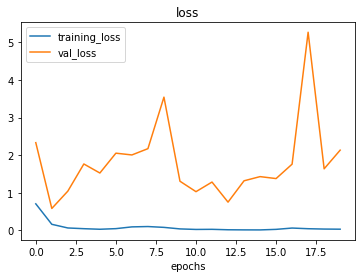

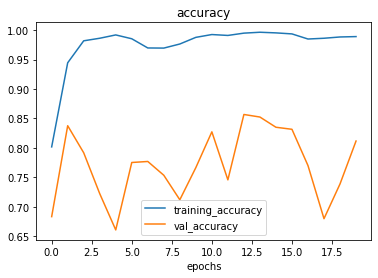

In [35]:
plot_loss_curves(hist_dict2)

# EXPERIMENT 3: MobileNetV1 from scratch

In [36]:
checkpoint_path = "/content/drive/MyDrive/Colab Notebooks/DeepLearning/mobilenet_scratchv1_multiclass_misc/cp-{epoch:04d}.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         monitor='val_accuracy',
                                                         save_weights_only=True,
                                                         save_best_only=True,
                                                         verbose=1)

In [37]:
def mobilenet_block (x, filters, strides):
    
    x = tf.keras.layers.DepthwiseConv2D(kernel_size = 3, strides = strides, padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    
    x = tf.keras.layers.Conv2D(filters = filters, kernel_size = 1, strides = 1)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    
    return x

In [38]:
input = tf.keras.layers.Input(shape = (250,250,3))
x = tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(input)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)

In [39]:
# main part of the model
x = mobilenet_block(x, filters = 64, strides = 1)
x = mobilenet_block(x, filters = 128, strides = 2)
x = mobilenet_block(x, filters = 128, strides = 1)
x = mobilenet_block(x, filters = 256, strides = 2)
x = mobilenet_block(x, filters = 256, strides = 1)
x = mobilenet_block(x, filters = 512, strides = 2)
for _ in range (5):
     x = mobilenet_block(x, filters = 512, strides = 1)
x = mobilenet_block(x, filters = 1024, strides = 2)
x = mobilenet_block(x, filters = 1024, strides = 1)
x = tf.keras.layers.GlobalAveragePooling2D (data_format='channels_last')(x)
output = tf.keras.layers.Dense (units=len(class_names), activation = 'softmax')(x)
model3 = tf.keras.models.Model(inputs=input, outputs=output)
model3.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 125, 125, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 125, 125, 32)     128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 125, 125, 32)      0         
                                                                 
 depthwise_conv2d (Depthwise  (None, 125, 125, 32)     320       
 Conv2D)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 32)     128 

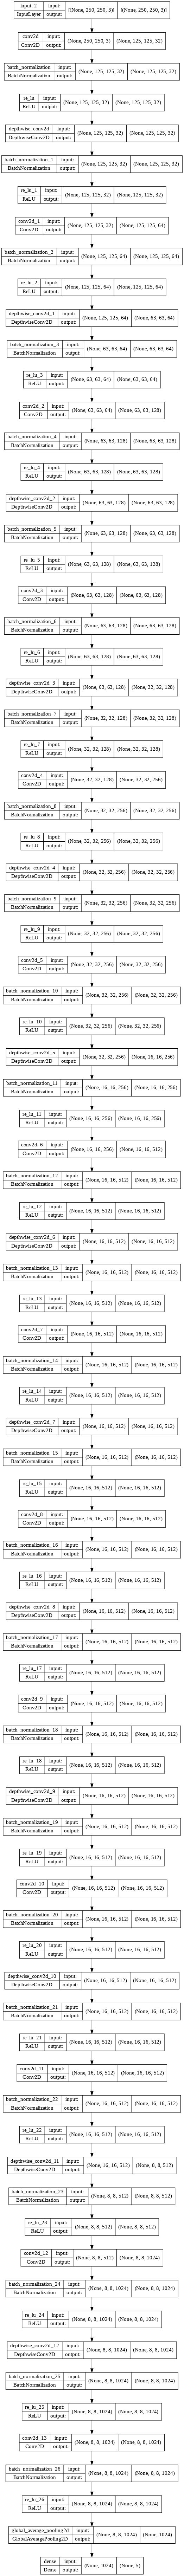

In [40]:
tf.keras.utils.plot_model(model3, show_shapes=True, dpi=76, to_file='model_v3.png')

In [41]:
model3.compile(loss='categorical_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [42]:
for i, layer in enumerate(model3.layers):
    print(i, layer.name, layer.input_shape, layer.output_shape, layer.trainable)

0 input_2 [(None, 250, 250, 3)] [(None, 250, 250, 3)] True
1 conv2d (None, 250, 250, 3) (None, 125, 125, 32) True
2 batch_normalization (None, 125, 125, 32) (None, 125, 125, 32) True
3 re_lu (None, 125, 125, 32) (None, 125, 125, 32) True
4 depthwise_conv2d (None, 125, 125, 32) (None, 125, 125, 32) True
5 batch_normalization_1 (None, 125, 125, 32) (None, 125, 125, 32) True
6 re_lu_1 (None, 125, 125, 32) (None, 125, 125, 32) True
7 conv2d_1 (None, 125, 125, 32) (None, 125, 125, 64) True
8 batch_normalization_2 (None, 125, 125, 64) (None, 125, 125, 64) True
9 re_lu_2 (None, 125, 125, 64) (None, 125, 125, 64) True
10 depthwise_conv2d_1 (None, 125, 125, 64) (None, 63, 63, 64) True
11 batch_normalization_3 (None, 63, 63, 64) (None, 63, 63, 64) True
12 re_lu_3 (None, 63, 63, 64) (None, 63, 63, 64) True
13 conv2d_2 (None, 63, 63, 64) (None, 63, 63, 128) True
14 batch_normalization_4 (None, 63, 63, 128) (None, 63, 63, 128) True
15 re_lu_4 (None, 63, 63, 128) (None, 63, 63, 128) True
16 depthwis

In [43]:
history3 = model3.fit(train_dataset,                    
                      validation_data=test_dataset,
                    #   validation_steps=int(0.2 * len(test_dataset)),
                      epochs=40,
                      callbacks=[checkpoint_callback])

Epoch 1/40
144/144 [==============================] - ETA: 0s - loss: 1.1054 - accuracy: 0.6520
Epoch 1: val_accuracy improved from -inf to 0.08073, saving model to /content/drive/MyDrive/Colab Notebooks/DeepLearning/mobilenet_scratchv1_multiclass_misc/cp-0001.ckpt
144/144 [==============================] - 45s 285ms/step - loss: 1.1054 - accuracy: 0.6520 - val_loss: 3.2029 - val_accuracy: 0.0807
Epoch 2/40
144/144 [==============================] - ETA: 0s - loss: 0.9967 - accuracy: 0.6781
Epoch 2: val_accuracy did not improve from 0.08073
144/144 [==============================] - 40s 278ms/step - loss: 0.9967 - accuracy: 0.6781 - val_loss: 2.6429 - val_accuracy: 0.0807
Epoch 3/40
144/144 [==============================] - ETA: 0s - loss: 0.9342 - accuracy: 0.6933
Epoch 3: val_accuracy improved from 0.08073 to 0.10503, saving model to /content/drive/MyDrive/Colab Notebooks/DeepLearning/mobilenet_scratchv1_multiclass_misc/cp-0003.ckpt
144/144 [==============================] - 40s 278

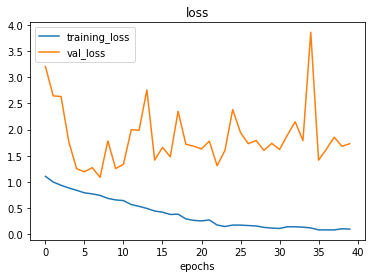

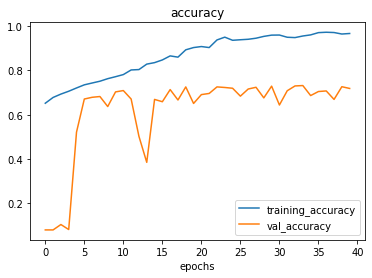

In [44]:
plot_loss_curves(history3)

In [45]:
model3.evaluate(test_dataset)

36/36 [==============================] - 3s 54ms/step - loss: 1.7286 - accuracy: 0.7188


[1.728580117225647, 0.71875]

In [46]:
latest = tf.train.latest_checkpoint("/content/drive/MyDrive/Colab Notebooks/DeepLearning/mobilenet_scratchv1_multiclass_misc")
latest

'/content/drive/MyDrive/Colab Notebooks/DeepLearning/mobilenet_scratchv1_multiclass_misc/cp-0034.ckpt'

In [47]:
loaded_model = tf.keras.models.clone_model(model3)
loaded_model.load_weights(latest)

In [48]:
loaded_model.compile(loss='categorical_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [49]:
loaded_model.evaluate(test_dataset)

36/36 [==============================] - 5s 53ms/step - loss: 1.7895 - accuracy: 0.7318


[1.7895344495773315, 0.7317708134651184]

# History Extension

In [ ]:
history3_ext = model3.fit(train_dataset,                    
                      validation_data=test_dataset,
                    #   validation_steps=int(0.2 * len(test_dataset)),
                      epochs=10,
                      callbacks=[checkpoint_callback])

Epoch 1/10
51/51 [==============================] - ETA: 0s - loss: 0.7331 - accuracy: 0.7096
Epoch 1: val_accuracy improved from 0.25935 to 0.26185, saving model to /content/drive/MyDrive/Colab Notebooks/DeepLearning/mobilenet_scratchv1_multiclass/cp-0001.ckpt
51/51 [==============================] - 12s 239ms/step - loss: 0.7331 - accuracy: 0.7096 - val_loss: 2.3431 - val_accuracy: 0.2618
Epoch 2/10
51/51 [==============================] - ETA: 0s - loss: 0.5981 - accuracy: 0.7714
Epoch 2: val_accuracy improved from 0.26185 to 0.32668, saving model to /content/drive/MyDrive/Colab Notebooks/DeepLearning/mobilenet_scratchv1_multiclass/cp-0002.ckpt
51/51 [==============================] - 13s 249ms/step - loss: 0.5981 - accuracy: 0.7714 - val_loss: 1.8910 - val_accuracy: 0.3267
Epoch 3/10
51/51 [==============================] - ETA: 0s - loss: 0.6523 - accuracy: 0.7583
Epoch 3: val_accuracy improved from 0.32668 to 0.44389, saving model to /content/drive/MyDrive/Colab Notebooks/DeepLea

In [ ]:
history3_ext_2 = model3.fit(train_dataset,                    
                      validation_data=test_dataset,
                    #   validation_steps=int(0.2 * len(test_dataset)),
                      epochs=10,
                      callbacks=[checkpoint_callback])

Epoch 1/10
51/51 [==============================] - ETA: 0s - loss: 0.3326 - accuracy: 0.8688
Epoch 1: val_accuracy did not improve from 0.54364
51/51 [==============================] - 13s 245ms/step - loss: 0.3326 - accuracy: 0.8688 - val_loss: 3.7640 - val_accuracy: 0.4514
Epoch 2/10
51/51 [==============================] - ETA: 0s - loss: 0.2842 - accuracy: 0.8963
Epoch 2: val_accuracy did not improve from 0.54364
51/51 [==============================] - 12s 234ms/step - loss: 0.2842 - accuracy: 0.8963 - val_loss: 3.0109 - val_accuracy: 0.5037
Epoch 3/10
51/51 [==============================] - ETA: 0s - loss: 0.3222 - accuracy: 0.8788
Epoch 3: val_accuracy did not improve from 0.54364
51/51 [==============================] - 12s 233ms/step - loss: 0.3222 - accuracy: 0.8788 - val_loss: 3.3930 - val_accuracy: 0.4389
Epoch 4/10
51/51 [==============================] - ETA: 0s - loss: 0.2172 - accuracy: 0.9225
Epoch 4: val_accuracy did not improve from 0.54364
51/51 [=================

In [ ]:
history3_ext_3 = model3.fit(train_dataset,                    
                      validation_data=test_dataset,
                    #   validation_steps=int(0.2 * len(test_dataset)),
                      epochs=10,
                      callbacks=[checkpoint_callback])

Epoch 1/10
51/51 [==============================] - ETA: 0s - loss: 0.1564 - accuracy: 0.9425
Epoch 1: val_accuracy did not improve from 0.57107
51/51 [==============================] - 12s 232ms/step - loss: 0.1564 - accuracy: 0.9425 - val_loss: 3.3755 - val_accuracy: 0.4913
Epoch 2/10
51/51 [==============================] - ETA: 0s - loss: 0.1471 - accuracy: 0.9507
Epoch 2: val_accuracy did not improve from 0.57107
51/51 [==============================] - 12s 230ms/step - loss: 0.1471 - accuracy: 0.9507 - val_loss: 3.2601 - val_accuracy: 0.5062
Epoch 3/10
51/51 [==============================] - ETA: 0s - loss: 0.1294 - accuracy: 0.9500
Epoch 3: val_accuracy did not improve from 0.57107
51/51 [==============================] - 12s 230ms/step - loss: 0.1294 - accuracy: 0.9500 - val_loss: 3.1103 - val_accuracy: 0.4963
Epoch 4/10
51/51 [==============================] - ETA: 0s - loss: 0.1240 - accuracy: 0.9575
Epoch 4: val_accuracy did not improve from 0.57107
51/51 [=================

In [ ]:
model3.evaluate(test_dataset)

13/13 [==============================] - 1s 62ms/step - loss: 2.9376 - accuracy: 0.4963


[2.937556505203247, 0.4962593615055084]

In [ ]:
model3.save("/content/drive/MyDrive/Colab Notebooks/DeepLearning/mobilenet_scratchv1_model")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/DeepLearning/mobilenet_scratchv1_model/assets


In [ ]:
latest = tf.train.latest_checkpoint("/content/drive/MyDrive/Colab Notebooks/DeepLearning/mobilenet_scratchv1_multiclass")
latest

'/content/drive/MyDrive/Colab Notebooks/DeepLearning/mobilenet_scratchv1_multiclass/cp-0008.ckpt'

In [ ]:
loaded_model = tf.keras.models.clone_model(model3)
loaded_model.load_weights(latest)

In [ ]:
loaded_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [ ]:
loaded_model.evaluate(test_dataset)

13/13 [==============================] - 2s 102ms/step - loss: 2.2446 - accuracy: 0.5711


[2.2446155548095703, 0.5710723400115967]

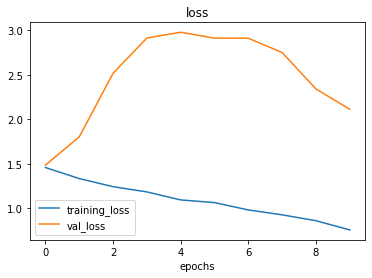

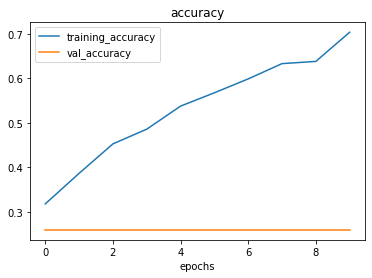

In [ ]:
plot_loss_curves(history3)

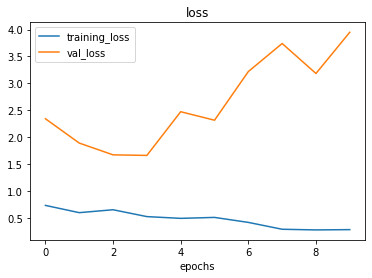

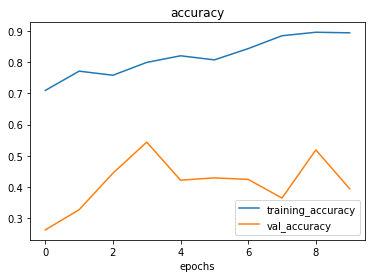

In [ ]:
plot_loss_curves(history3_ext)

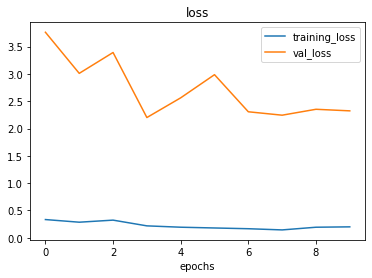

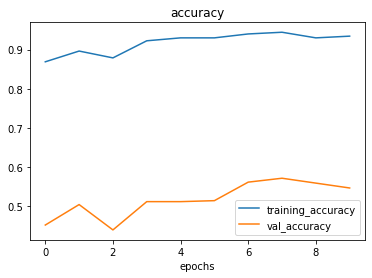

In [ ]:
plot_loss_curves(history3_ext_2)

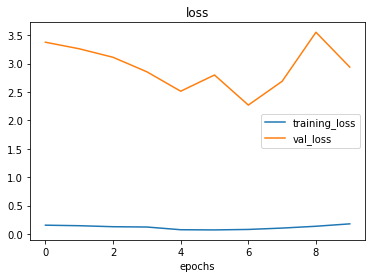

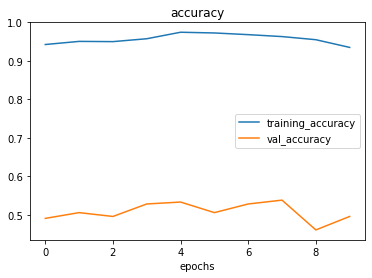

In [ ]:
plot_loss_curves(history3_ext_3)

In [ ]:
import copy

In [ ]:
hist_dict = copy.deepcopy(history3)
hist_dict

INFO:tensorflow:Assets written to: ram://e0a31081-27aa-4f25-9ab5-be6c0af1ffaf/assets


In [ ]:
import itertools

In [ ]:
hist_dict.history['accuracy'] = [*history3.history['accuracy'], *history3_ext.history['accuracy'], *history3_ext_2.history['accuracy'], *history3_ext_3.history['accuracy']] 
hist_dict.history['val_accuracy'] = [*history3.history['val_accuracy'], *history3_ext.history['val_accuracy'], *history3_ext_2.history['val_accuracy'], *history3_ext_3.history['val_accuracy']] 
hist_dict.history['loss'] = [*history3.history['loss'], *history3_ext.history['loss'], *history3_ext_2.history['loss'], *history3_ext_3.history['loss']] 
hist_dict.history['val_loss'] = [*history3.history['val_loss'], *history3_ext.history['val_loss'], *history3_ext_2.history['val_loss'], *history3_ext_3.history['val_loss']] 

In [ ]:
hist_dict.history

{'accuracy': [0.317926287651062,
  0.38663336634635925,
  0.45284196734428406,
  0.48594629764556885,
  0.5377888679504395,
  0.5677701234817505,
  0.5990006327629089,
  0.633354127407074,
  0.6383510231971741,
  0.7039350271224976,
  0.709556519985199,
  0.7713928818702698,
  0.758276104927063,
  0.7995002865791321,
  0.8207370638847351,
  0.8076202273368835,
  0.8438475728034973,
  0.8850718140602112,
  0.896314799785614,
  0.8944409489631653,
  0.868831992149353,
  0.896314799785614,
  0.8788257241249084,
  0.9225484132766724,
  0.9300436973571777,
  0.9300436973571777,
  0.9400374889373779,
  0.9444097280502319,
  0.9300436973571777,
  0.9344159960746765,
  0.942535936832428,
  0.9506558179855347,
  0.9500312209129333,
  0.9575265645980835,
  0.974390983581543,
  0.972517192363739,
  0.9681448936462402,
  0.9631480574607849,
  0.9550281167030334,
  0.9350405931472778],
 'loss': [1.4587002992630005,
  1.3347901105880737,
  1.2439600229263306,
  1.1850197315216064,
  1.09531807899475

In [ ]:
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss'])) # How many epochs

    
    # Plot loss
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

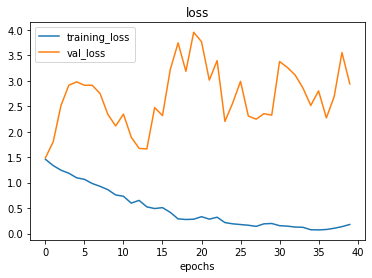

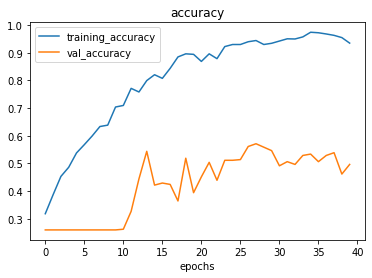

In [ ]:
plot_loss_curves(hist_dict)

# Data Augmentation

Train former model, for another 10 epoch with combined augmentation data

In [ ]:
checkpoint_path = "/content/drive/MyDrive/Colab Notebooks/DeepLearning/transfer_mobilenet_multiclass_aug/cp-{epoch:04d}.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         monitor='val_accuracy',
                                                         save_weights_only=True,
                                                         save_best_only=True,
                                                         verbose=1)

In [ ]:
latest = tf.train.latest_checkpoint("/content/drive/MyDrive/Colab Notebooks/DeepLearning/transfer_mobilenet_multiclass")
latest

'/content/drive/MyDrive/Colab Notebooks/DeepLearning/transfer_mobilenet_multiclass/cp-0010.ckpt'

In [ ]:
loaded_model = tf.keras.models.clone_model(model)
loaded_model.load_weights(latest)

In [ ]:
loaded_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [ ]:
loaded_model.evaluate(test_dataset)

38/38 [==============================] - 15s 56ms/step - loss: 0.3464 - accuracy: 0.8710


[0.3463795483112335, 0.8710482716560364]

In [ ]:
history_aug = loaded_model.fit(train_dataset,                    
                    validation_data=test_dataset,
                    # validation_steps=int(0.2 * len(test_dataset)),
                    epochs=10,
                    callbacks=[checkpoint_callback])

Epoch 1/10
151/151 [==============================] - ETA: 0s - loss: 1.4447 - accuracy: 0.4613
Epoch 1: val_accuracy did not improve from 0.50915
151/151 [==============================] - 13s 72ms/step - loss: 1.4447 - accuracy: 0.4613 - val_loss: 1.1404 - val_accuracy: 0.4825
Epoch 2/10
151/151 [==============================] - ETA: 0s - loss: 0.9851 - accuracy: 0.5445
Epoch 2: val_accuracy did not improve from 0.50915
151/151 [==============================] - 11s 71ms/step - loss: 0.9851 - accuracy: 0.5445 - val_loss: 1.1333 - val_accuracy: 0.4917
Epoch 3/10
150/151 [============================>.] - ETA: 0s - loss: 0.9118 - accuracy: 0.5681
Epoch 3: val_accuracy did not improve from 0.50915
151/151 [==============================] - 11s 71ms/step - loss: 0.9113 - accuracy: 0.5685 - val_loss: 1.1307 - val_accuracy: 0.4917
Epoch 4/10
151/151 [==============================] - ETA: 0s - loss: 0.8719 - accuracy: 0.5820
Epoch 4: val_accuracy did not improve from 0.50915
151/151 [====

In [ ]:
loaded_model.evaluate(test_dataset)

38/38 [==============================] - 3s 50ms/step - loss: 1.1648 - accuracy: 0.4884


[1.1648166179656982, 0.4883527457714081]